In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [11]:
# preparing the data

# Set random seed
np.random.seed(42)

# Number of samples
num_samples = 550

# Generate normal distributed CGPA around 7.0 with std deviation 1.0
cgpa = np.clip(np.random.normal(7.0, 1.0, num_samples), 5.0, 10.0)

# Generate normal distributed Score around 500 with std deviation 100
score = np.clip(np.random.normal(500, 100, num_samples), 200, 800)

# Linear rule: if (CGPA * 10 + Score) > 1200 → Placed = 1
placed = []
for i in range(num_samples):
    decision_boundary = cgpa[i]*10 + score[i]
    if decision_boundary> 567:
        placed.append(1)
    else:
        placed.append(0)


# Create DataFrame
dataset = pd.DataFrame({
    'CGPA': cgpa,
    'Score': score,
    'Placed': placed
})

# Show a sample
dataset.head()

,CGPA,Score,Placed
0,7.496714,508.658979,1
1,6.861736,484.432276,0
2,7.647689,616.778206,1
3,8.523030,525.442084,1
4,6.765847,533.760266,1


In [12]:
# check null values
dataset.isnull().sum()

CGPA      0
Score     0
Placed    0
dtype: int64

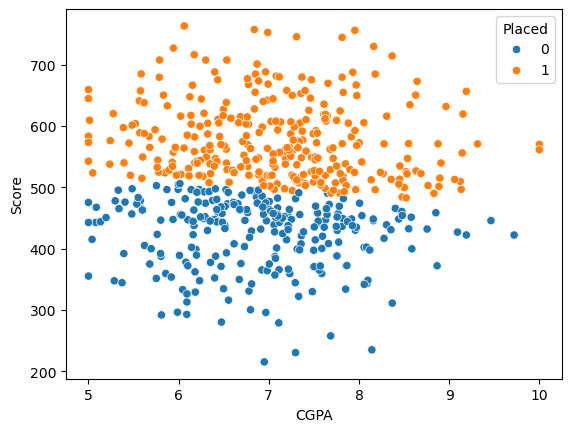

In [13]:
# plot the graph for distribution

sns.scatterplot(x='CGPA', y='Score', data=dataset, hue='Placed')
plt.show()

In [14]:
# input and output selection

x = dataset.iloc[:, :-1]
y = dataset['Placed']

In [15]:
# train test and split

from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# model selection and train

from sklearn.svm import SVC

svmc= SVC(kernel="linear")   # you could change the kernel for batter result

# 'linear', 'poly', 'sigmoid', 'rbf', 'precomputed'

In [29]:
svmc.fit(x_train, y_train)

SVC(kernel='linear')

In [33]:
# check the accuracy 
svmc.score(x_test, y_test)

0.9818181818181818

In [34]:
# check for the overfitting

svmc.score(x_train, y_train)

0.9977272727272727

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


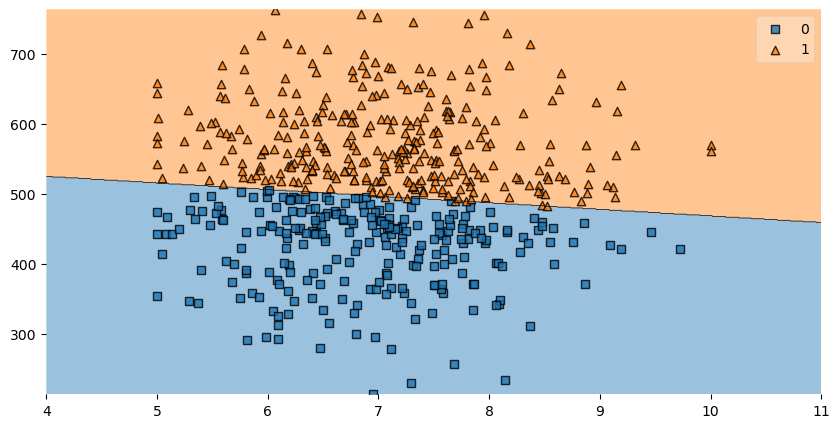

In [35]:
# now check the decision regions

plt.figure(figsize=(10, 5))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=svmc)
plt.show()

## Using NonLinear Dataset

In [36]:
np.random.seed(42)
num_samples = 550

cgpa = np.clip(np.random.normal(7.0, 1.0, num_samples), 5.0, 10.0)
score = np.clip(np.random.normal(500, 100, num_samples), 200, 800)

placed = []
for i in range(num_samples):
    # Nonlinear decision boundary: circle in the CGPA-Score space
    if (cgpa[i] - 7.0)**2 + ((score[i] - 500)/100)**2 < 2.5:
        placed.append(1)
    else:
        placed.append(0)

dataset = pd.DataFrame({
    'CGPA': cgpa,
    'Score': score,
    'Placed': placed
})

print(dataset['Placed'].value_counts())
dataset.head()

Placed
1    401
0    149
Name: count, dtype: int64


,CGPA,Score,Placed
0,7.496714,508.658979,1
1,6.861736,484.432276,1
2,7.647689,616.778206,1
3,8.523030,525.442084,1
4,6.765847,533.760266,1


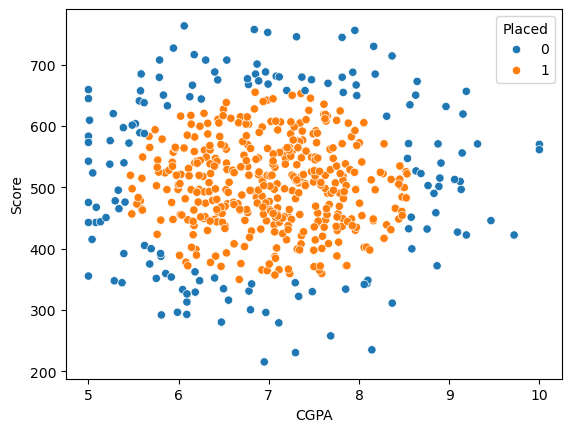

In [37]:
# check the graph for linearity

sns.scatterplot(x='CGPA', y='Score', data= dataset, hue='Placed')
plt.show()

In [38]:
# input output

x = dataset.iloc[:, :-1]
y = dataset['Placed']

In [39]:
# train test split and model selection 

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)

In [54]:
svmc = SVC(kernel="rbf")

In [55]:
svmc.fit(x_train, y_train)

SVC()

In [50]:
svmc.score(x_test, y_test)

0.8068181818181818

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


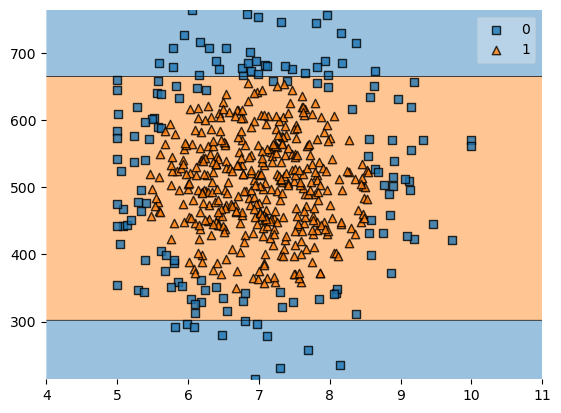

In [51]:
# plot the decision regions

plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=svmc)
plt.show()